In [1]:
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:Red;font-family:verdana;"> Telecom Churn Prediction </h1></b></marquee>


## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Objectives

The main goal of this case study is to develop machine learning models for predicting churn. The predictive models have the following purposes:

* Predicting whether a high-value customer is likely to churn in the near future (i.e., churn phase). This information can assist the company in taking proactive measures such as offering special plans or discounts on recharge to retain customers.

* Identifying significant variables that strongly indicate churn. These variables can provide insights into the reasons why customers choose to switch to other networks.

Based on observations, strategies for managing customer churn are recommended.


### Steps 

1. Data Understanding, Preparation, and Pre-Processing :
   - Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
   - Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format
   
2. Exploratory Data Analysis :
   - Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
   - Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
   
3. Feature Engineering and Variable Transformation :
   - Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
   - Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
   
4. Model Selection, Model Building, and  Prediction :
   - Identifying the type of problem and making a list of decisive models from all available choices
   - Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
   - Testing each model on the respective model evaluation metric
   - Choosing the best model based on the fit of the data set and output variable
   - Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

In [25]:
"""loading necessary libraries"""

#import EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#filter warnings and change pd params
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)


#import data preprocessing 
import sklearn
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer #dealing with missing values -categorial
from sklearn.experimental import enable_iterative_imputer, enable_halving_search_cv
from sklearn.impute import IterativeImputer #dealing with missing values - numeric
import imblearn 
from imblearn.over_sampling import SMOTE #handle class imbalnce
from sklearn.decomposition import PCA #reduce dimensionality
from scipy import stats
from sklearn.manifold import TSNE

#models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression #provides feature importances
from sklearn.ensemble import RandomForestClassifier #provides feature importances


#metrics and selection
from sklearn.metrics import roc_auc_score, classification_report #roc_auc score and a full classification report
from sklearn.model_selection import train_test_split, StratifiedKFold, HalvingGridSearchCV
from sklearn.pipeline import Pipeline

#time
import datetime

"""random_state for all cases will be 2121"""

seed = 2121

In [3]:
#calculate how long it takes for notebook to run 

notebook_start_time = datetime.datetime.now()

print(f'notebook commenced running at {notebook_start_time}')

notebook commenced running at 2023-05-31 16:22:45.612826


#### Step 1: Data Understanding, Preparation, and Pre-Processing :

- Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
- Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format

In [4]:
telecom_train = pd.read_csv("train.csv")
telecom_test = pd.read_csv("test.csv")

data_dict = pd.read_csv("data_dictionary.csv")

In [5]:
telecom_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [6]:
#function for summarising dataframe metadata/summary
"""credit: kimtaehun from kaggle - Simple EDA and baseline with LGBM | (AUC >0.94)"""

def summary(df):
    print(f'data shape: {df.shape}')
    print(f'data info: {df.info()}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = (df.isnull().sum().values / len(df))*100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(percentiles=[0.5, 0.95], include='all').T)
    summ['min'] = desc['min'].values
    summ['median'] = desc['50%'].values
    summ['95%'] = desc['95%'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [7]:
telecom_train['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

strong imbalance in target

In [8]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [9]:
summary(telecom_train)

data shape: (69999, 172)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
data info: None


,data type,#missing,%missing,#unique,min,median,95%,max,first value,second value,third value
id,int64,0,0.000000,69999,0.0,34999.0,66498.1,69998.0,0,1,2
circle_id,int64,0,0.000000,1,109.0,109.0,109.0,109.0,109,109,109
loc_og_t2o_mou,float64,702,1.002871,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,float64,702,1.002871,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,float64,702,1.002871,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,object,0,0.000000,1,NaN,NaN,NaN,NaN,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,object,399,0.570008,1,NaN,NaN,NaN,NaN,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,object,733,1.047158,1,NaN,NaN,NaN,NaN,8/31/2014,8/31/2014,8/31/2014
arpu_6,float64,0,0.000000,61615,-2258.709,197.484,832.0227,27731.088,31.277,0.0,60.806
arpu_7,float64,0,0.000000,61425,-1289.715,191.588,823.2367,35145.834,87.009,122.787,103.176


- one unique columns may be dropped after confirming they provide no hints toward missing values in other columns
- missing value counts all line up, implying that one or more columns may hold the key to imputing that data
- take a look at churn probabily and the nans in onnet_mou_6/7/8 to see if they follow a specific pattern - countplot()
  i somewhat suspect that these NaNs for onnet_mou_6/7/8 are clients that have no service in those months.
- dates to be updated from objects to dt and time since recharge for each month calcuated based on the date of the first in the next month so jul/aug/sep 1 2014 
- everything else seems to be numeric, some values are negative so a standard scaler would be best in this case
- appear to be quite a few outliers in some fields but this is churn, what if outliers are those more likely to churn. Also since I will use PCA at some point, these columns will have higher variance so more information.
- 

In [10]:
#taking a look at the nulls
# Filter rows where 'onnet_mou_6' is null
null_onnet_df = telecom_train[telecom_train['onnet_mou_6'].isnull()]

# Count NaNs per category in 'churn_probability'
nan_counts = null_onnet_df['churn_probability'].value_counts()
nan_counts

0    1856
1     912
Name: churn_probability, dtype: int64

912 churned while 1856 did not, want to look at a few rows in their entirety. Do not want to drop them without being sure i can not impute them

In [11]:
telecom_train[telecom_train['onnet_mou_6'].isnull()].head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
26,26,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,36.344,104.570,NaN,2.86,1.75,NaN,28.66,86.83,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.83,0.00,NaN,0.00,5.76,NaN,0.00,0.50,NaN,0.00,0.00,NaN,0.83,6.26,NaN,2.03,1.75,NaN,28.66,80.56,NaN,0.0,0.00,NaN,0.0,0.0,NaN,30.69,82.31,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0.0,31.53,88.58,NaN,0.00,0.00,NaN,2.91,6.94,NaN,0.00,1.64,NaN,2.91,8.59,NaN,0.00,0.00,NaN,0.15,2.30,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.15,2.30,0.0,3.06,10.89,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.0,1,3,11,0,50,110,0,20,30,6/14/2014,7/29/2014,8/30/2014,0,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1276,0.0,0.00,0.00,0
33,33,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,438.077,0.000,213.781,NaN,NaN,0.00,NaN,NaN,2.68,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,2.68,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,2.68,NaN,NaN,0.0,0.0,0.00,2.68,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,1,3,2,505,0,252,505,0,252,6/8/2014,7/27/2014,8/31/2014,505,0,252,6/8/2014,NaN,8/31/2014,1.0,NaN,1.0,505.0,NaN,252.0,0.0,NaN,0.0,1.0,NaN,1.0,505.0,NaN,252.0,0.0,0.00,0.0,756.47,0.00,74.29,442.58,NaN,212.17,442.58,NaN,212

would be nice if someone from the company could shed light on this but some could be new sign ups, others with all null. thr 74% columns are jus those with no data plan. Will impute those and come back to these

In [12]:
#change date times to date times
#needed before imputing into the field

for col in telecom_train.columns:
    if telecom_train[col].dtype == 'object':
        try:
            telecom_train[col] = pd.to_datetime(telecom_train[col])
        except ValueError:
            # Handle columns that cannot be converted to datetime
            pass
    
    
telecom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: datetime64[ns](9), float64(135), int64(28)
memory usage: 91.9 MB


In [13]:
telecom_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,NaT,2014-07-08,NaT,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,

no more object fields. let's build some new columns :) 

In [14]:
#dt columns
last_recharges = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


#last of months in dt
end_june = datetime.datetime.strptime('2014-06-30', '%Y-%m-%d')
end_jul = datetime.datetime.strptime('2014-07-31', '%Y-%m-%d')
end_aug = datetime.datetime.strptime('2014-08-31', '%Y-%m-%d')

#june
telecom_train['days_since_rech_6'] = (end_june - telecom_train['date_of_last_rech_6']).dt.days
telecom_train['days_since_rech_data_6'] = (end_june - telecom_train['date_of_last_rech_data_6']).dt.days

#jul
telecom_train['days_since_rech_7'] = (end_jul - telecom_train['date_of_last_rech_7']).dt.days
telecom_train['days_since_rech_data_7'] = (end_jul - telecom_train['date_of_last_rech_data_7']).dt.days

#aug
telecom_train['days_since_rech_8'] = (end_aug - telecom_train['date_of_last_rech_8']).dt.days
telecom_train['days_since_rech_data_8'] = (end_aug - telecom_train['date_of_last_rech_data_8']).dt.days

#drop last date of month columns
telecom_train.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',
'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
'date_of_last_rech_data_8'], axis = 1, inplace = True)

columns with more than 70% nulls

binary_null_fields = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
fill those nans with 0 cause they got no data :p 

70_plus_null_others = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7',
'arpu_2g_8']
these can be imputed to 0 since the client does not use those services and would use 0 or contribute 0 to the amount

days_nulls = ['days_since_rech_data_6','days_since_rech_data_7','days_since_rech_data_8']
since they do not use data or top up the days should be the max for that column i.e max means max or more

In [15]:
#binaries to 0 when client has no data
binary_null_fields = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

for col in binary_null_fields:
    telecom_train[col].fillna(value=0, inplace=True)
    

#fill in the other 70 plus as 0 exclusing the value fields. will handle later after spliting data
plus_70_null_others = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7',
                       'max_rech_data_8', 'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6',
                       'count_rech_3g_7','count_rech_3g_8', 'av_rech_amt_data_6','av_rech_amt_data_7',
                       'av_rech_amt_data_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'] 

for col in plus_70_null_others:
    telecom_train[col].fillna(value=0, inplace=True)
    
#field identifying whether client has dataplan or not in said month

telecom_train['has_data_6'] = telecom_train['av_rech_amt_data_6'].apply(lambda x : 1 if x > 0 else 0)
telecom_train['has_data_7'] = telecom_train['av_rech_amt_data_7'].apply(lambda x : 1 if x > 0 else 0)
telecom_train['has_data_8'] = telecom_train['av_rech_amt_data_8'].apply(lambda x : 1 if x > 0 else 0)

#fill in the nulls for the days fields as max
days_nulls = ['days_since_rech_data_6','days_since_rech_data_7','days_since_rech_data_8', 'days_since_rech_6',
            'days_since_rech_7','days_since_rech_8'] 

for col in days_nulls:
    telecom_train[col].fillna(value=telecom_train[col].max(), inplace=True)


More confident that these null values imply that simply clients that did not have the service in that month. Their bill may have been unpaid or they simply used another service and that line was secondary. Will impute them as 0.

loc_og_t2o_mou and other one value fields can be dropped as well and id


In [16]:
#dropping those fields
telecom_train.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','circle_id','id','std_ic_t2o_mou_6',
             'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
            'std_og_t2c_mou_8'], axis=1 , inplace=True)

for col in telecom_train.columns:
    null_percentage = (telecom_train[col].isnull().sum() / len(telecom_train)) * 100
    if  null_percentage > 3 and null_percentage < 6:
        telecom_train[col].fillna(value=0, inplace=True)
        
#check summary again
summary(telecom_train)

data shape: (69999, 161)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 161 entries, arpu_6 to has_data_8
dtypes: float64(132), int64(29)
memory usage: 86.0 MB
data info: None


,data type,#missing,%missing,#unique,min,median,95%,max,first value,second value,third value
arpu_6,float64,0,0.0,61615,-2258.709,197.484,832.0227,27731.088,31.277,0.000,60.806
arpu_7,float64,0,0.0,61425,-1289.715,191.588,823.2367,35145.834,87.009,122.787,103.176
arpu_8,float64,0,0.0,60194,-945.808,192.234,828.4647,33543.624,7.527,42.953,0.000
onnet_mou_6,float64,0,0.0,20057,0.000,30.830,598.6000,7376.710,48.580,0.000,0.530
onnet_mou_7,float64,0,0.0,20076,0.000,29.160,608.8780,8157.780,124.380,0.000,15.930
onnet_mou_8,float64,0,0.0,19725,0.000,27.840,596.1250,10752.560,1.290,0.000,0.000
offnet_mou_6,float64,0,0.0,26254,0.000,89.810,719.5000,8362.360,32.240,0.000,53.990
offnet_mou_7,float64,0,0.0,26139,0.000,85.590,731.6020,7043.980,96.680,25.990,82.050
offnet_mou_8,float64,0,0.0,25995,0.000,83.010,715.9150,14007.340,2.330,30.890,0.000
roam_ic_mou_6,float64,0,0.0,5306,0.000,0.000,38.8420,2850.980,0.000,0.000,0.000


only the arpu for data services still have null values but will

In [17]:
summary(telecom_test)

data shape: (30000, 171)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB
data info: None


,data type,#missing,%missing,#unique,min,median,95%,max,first value,second value,third value
id,int64,0,0.000000,30000,69999.0,84998.5,98498.05,99998.0,69999,70000,70001
circle_id,int64,0,0.000000,1,109.0,109.0,109.0,109.0,109,109,109
loc_og_t2o_mou,float64,316,1.053333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,float64,316,1.053333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,float64,316,1.053333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,object,0,0.000000,1,NaN,NaN,NaN,NaN,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,object,202,0.673333,1,NaN,NaN,NaN,NaN,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,object,367,1.223333,1,NaN,NaN,NaN,NaN,8/31/2014,8/31/2014,8/31/2014
arpu_6,float64,0,0.000000,27493,-185.043,198.2275,821.1743,10955.066,91.882,414.168,329.844
arpu_7,float64,0,0.000000,27406,-2014.045,191.775,837.9308,13224.119,65.33,515.568,434.884


Conducting the same steps taken for the train set for the test set for data prep but will do this on a copy

NB it follows the same pattern as the training data so will build a function do do all the steps taken thus far



In [18]:
#copy test data

telecom_test_copy = telecom_test.copy()

def test_prep(df):
    
    #change to date time
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])
            except ValueError:
                # Handle columns that cannot be converted to datetime
                pass
        
    #make columns for recharge days
    #june
    df['days_since_rech_6'] = (end_june - df['date_of_last_rech_6']).dt.days
    df['days_since_rech_data_6'] = (end_june - df['date_of_last_rech_data_6']).dt.days

    #jul
    df['days_since_rech_7'] = (end_jul - df['date_of_last_rech_7']).dt.days
    df['days_since_rech_data_7'] = (end_jul - df['date_of_last_rech_data_7']).dt.days

    #aug
    df['days_since_rech_8'] = (end_aug - df['date_of_last_rech_8']).dt.days
    df['days_since_rech_data_8'] = (end_aug - df['date_of_last_rech_data_8']).dt.days

    #drop last date of month columns
    df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',
    'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
    'date_of_last_rech_data_8'], axis = 1, inplace = True)
    
    #binaries to 0 when client has no data

    for col in binary_null_fields:
        df[col].fillna(value=0, inplace=True)

    #fill in the other 70 plus as 0 exclusing the value fields. will handle later after spliting data
    for col in plus_70_null_others:
        df[col].fillna(value=0, inplace=True)

    #field identifying whether client has dataplan or not in said month

    df['has_data_6'] = df['av_rech_amt_data_6'].apply(lambda x : 1 if x > 0 else 0)
    df['has_data_7'] = df['av_rech_amt_data_7'].apply(lambda x : 1 if x > 0 else 0)
    df['has_data_8'] = df['av_rech_amt_data_8'].apply(lambda x : 1 if x > 0 else 0)

    #fill in the nulls for the days fields as max
    for col in days_nulls:
        df[col].fillna(value=telecom_train[col].max(), inplace=True)
        
     #dropping those fields with 1 unique or no true value
    df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','circle_id','id','std_ic_t2o_mou_6',
             'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
            'std_og_t2c_mou_8'], axis=1 , inplace=True)

    for col in df.columns:
        null_percentage = (df[col].isnull().sum() / len(df)) * 100
        if  null_percentage > 3 and null_percentage < 6:
            df[col].fillna(value=0, inplace=True)   
        
        
    return df

telecom_test_copy = test_prep(telecom_test_copy)

summary(telecom_test_copy)

data shape: (30000, 160)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 160 entries, arpu_6 to has_data_8
dtypes: float64(132), int64(28)
memory usage: 36.6 MB
data info: None


,data type,#missing,%missing,#unique,min,median,95%,max,first value,second value,third value
arpu_6,float64,0,0.0,27493,-185.043,198.2275,821.17430,10955.066,91.882,414.168,329.844
arpu_7,float64,0,0.0,27406,-2014.045,191.7750,837.93080,13224.119,65.330,515.568,434.884
arpu_8,float64,0,0.0,26871,-146.859,191.6905,842.55415,13505.996,64.445,360.868,746.239
onnet_mou_6,float64,0,0.0,12283,0.000,31.4000,587.76600,6944.360,31.780,75.510,7.540
onnet_mou_7,float64,0,0.0,12176,0.000,29.4100,601.69200,7411.010,20.230,41.210,7.860
onnet_mou_8,float64,0,0.0,12054,0.000,28.4800,592.09800,6723.790,23.110,19.840,8.400
offnet_mou_6,float64,0,0.0,16382,0.000,89.2800,695.83850,6962.460,60.160,474.340,16.980
offnet_mou_7,float64,0,0.0,16151,0.000,84.9250,719.32950,9667.130,32.160,621.840,45.810
offnet_mou_8,float64,0,0.0,16005,0.000,83.4850,701.67100,13547.840,34.830,394.940,45.040
roam_ic_mou_6,float64,0,0.0,3072,0.000,0.0000,37.51000,13724.380,0.000,0.000,22.810


test dataset is prepared. Will move on to EDA

#### Step 2 Exploratory Data Analysis :

- Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
- Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data

In [19]:
#categorical variables have binary values 
cat_vars = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
            'fb_user_8','has_data_6','has_data_7','has_data_8']

#numeric field
num_vars = [x for x in telecom_train.columns if x not in cat_vars]
num_vars.remove('churn_probability')

y_value = 'churn_probability'

In [20]:
#plots for numerics
"""credit: kimtaehun from kaggle - Simple EDA and baseline with LGBM | (AUC >0.94)"""
def numeric_graphs(df, num_vars, y_value):
    fig = plt.figure(figsize=(18,70))
    for idx, col in enumerate(num_vars):
        ax = plt.subplot(17, 3, idx + 1)
        sns.histplot(
            data=df, hue=y_value, fill=True,
            x=col, palette=['#9E0000', '#009E9E'], legend=False,
            bins=10, kde=True
        )

        ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
        ax.set_xlabel(''); ax.spines['right'].set_visible(False)
        ax.set_title(f'{col}', loc='right', 
                     weight='bold', fontsize=12)

    fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=25)
    fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=9, ncol=3)
    plt.tight_layout()
    plt.show()
    
    
#plots for categorical vs response
def cat_plots(df, cat_vars, y_value):
    
    df = df.dropna()
    for col in cat_vars:
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 2, 1)
        sns.countplot(x=col, data=df, hue=y_value)
        plt.xticks(rotation=30)
        plt.subplot(1, 2, 2)
        sns.barplot(x=col, y=y_value, data=df, estimator=sum)
        plt.xticks(rotation=30)
        plt.show()

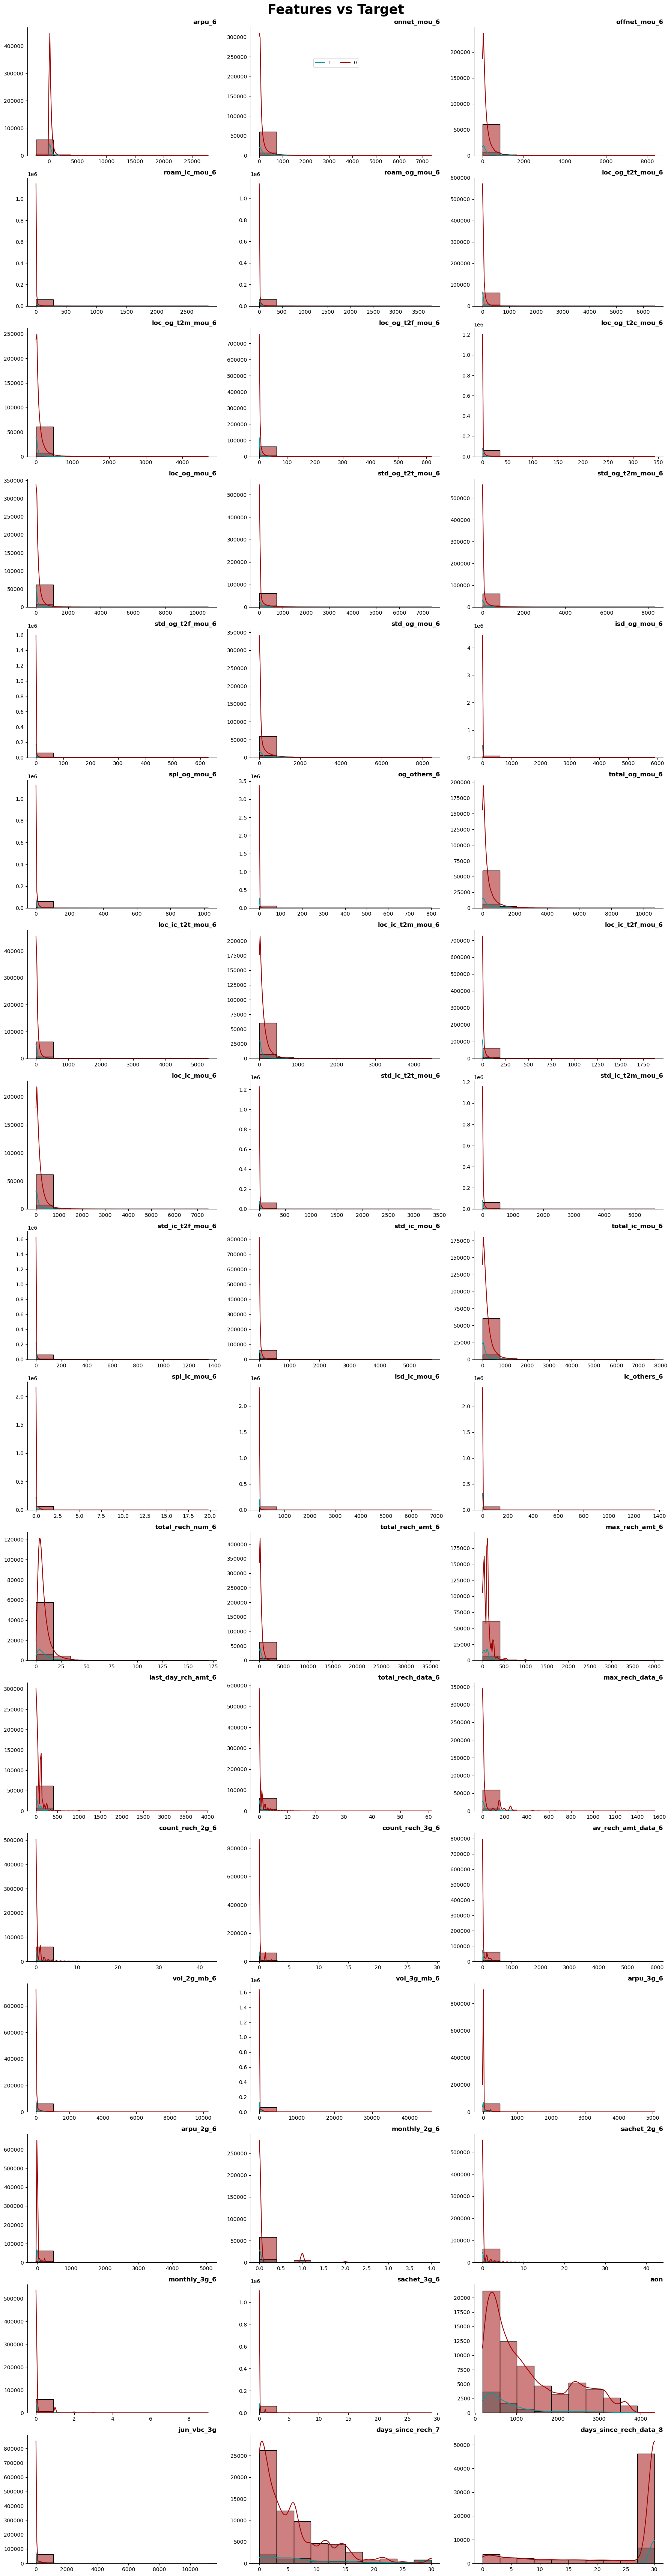

In [21]:
"""over 14 numeric variables so will take every 3 which should cover at least one month each time"""
numeric_graphs(telecom_train, num_vars[::3], y_value)

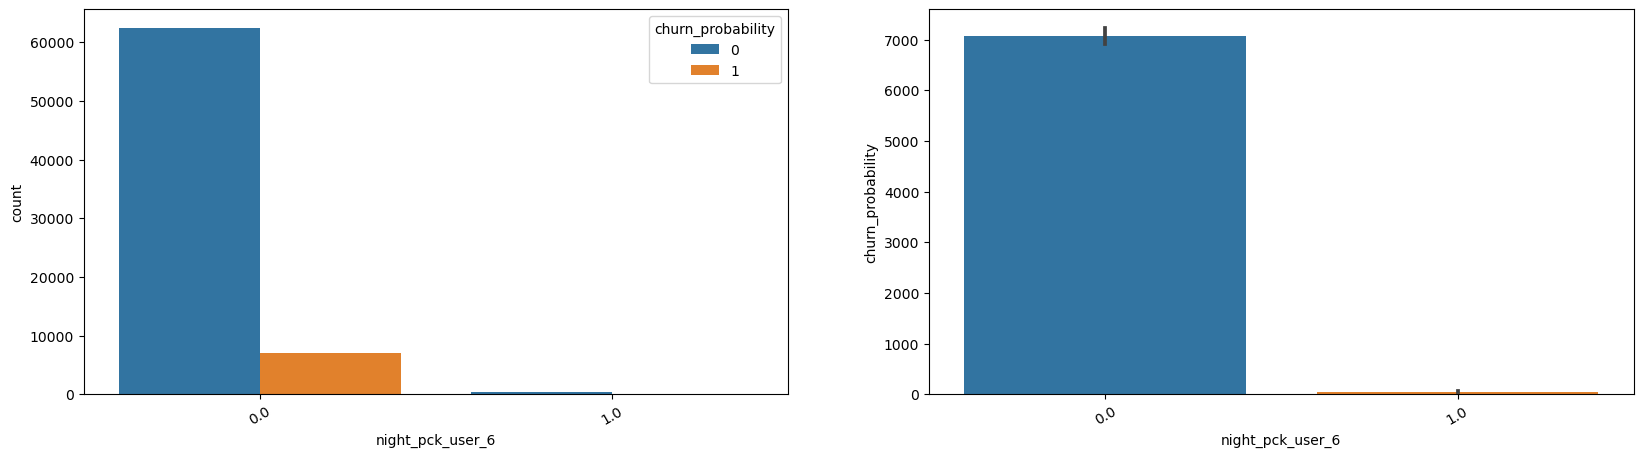

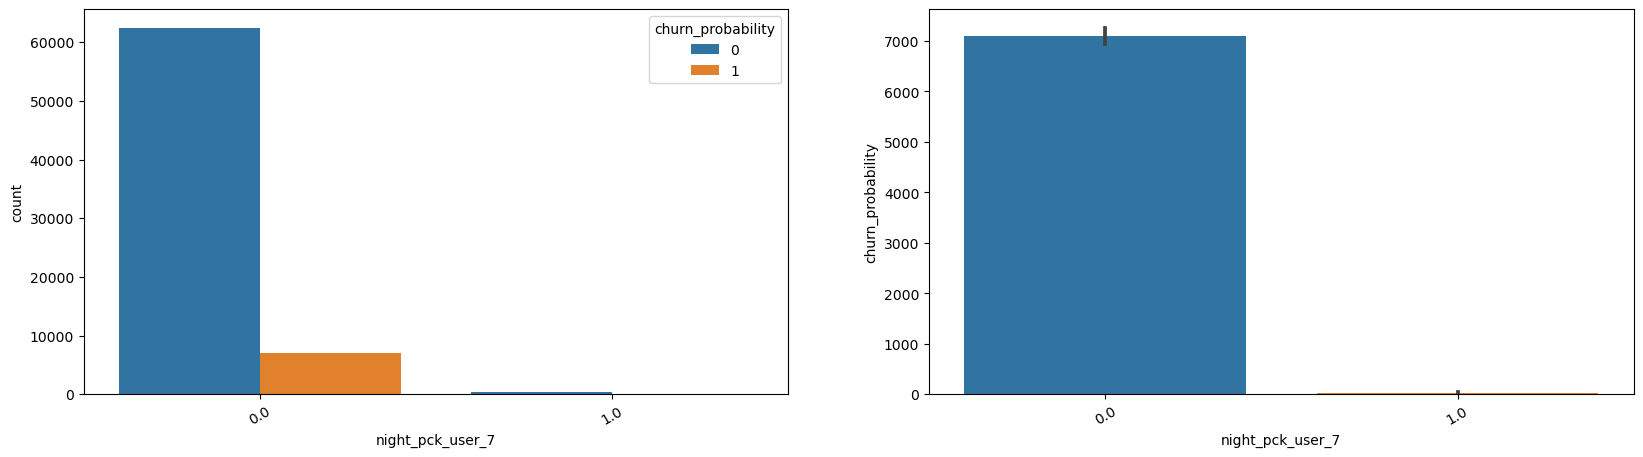

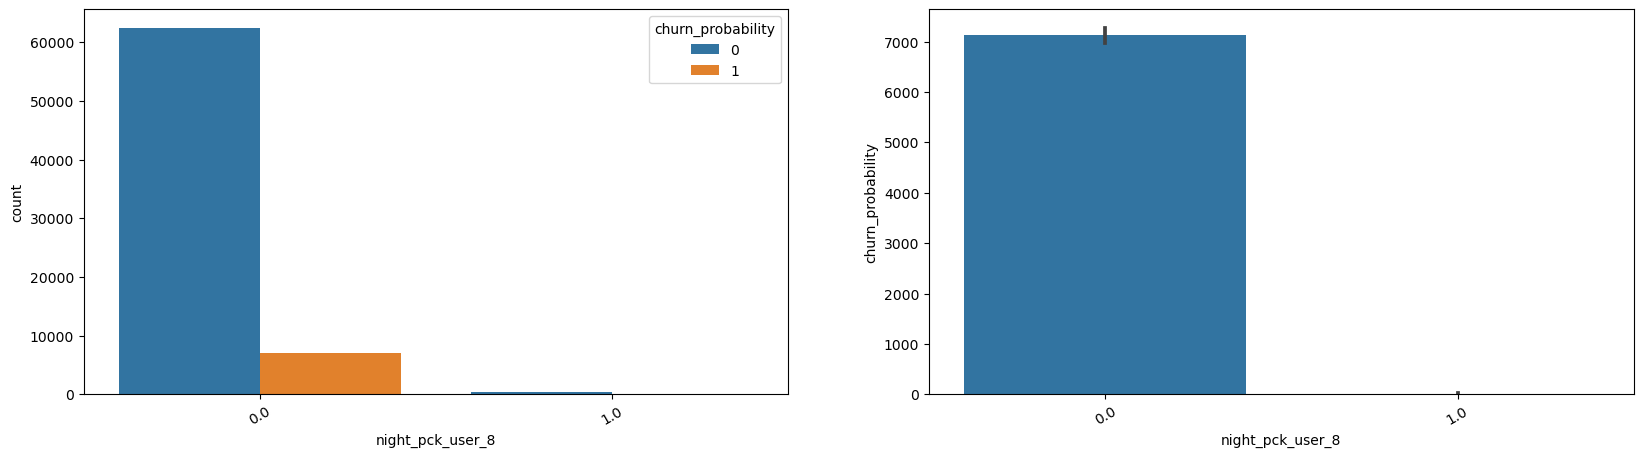

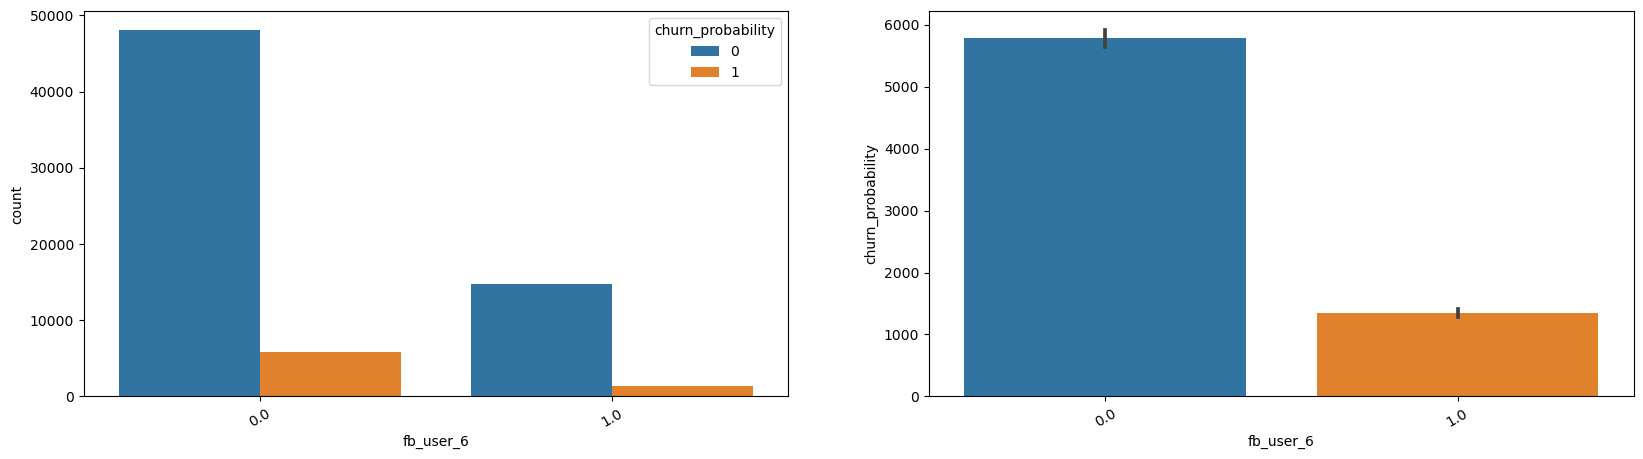

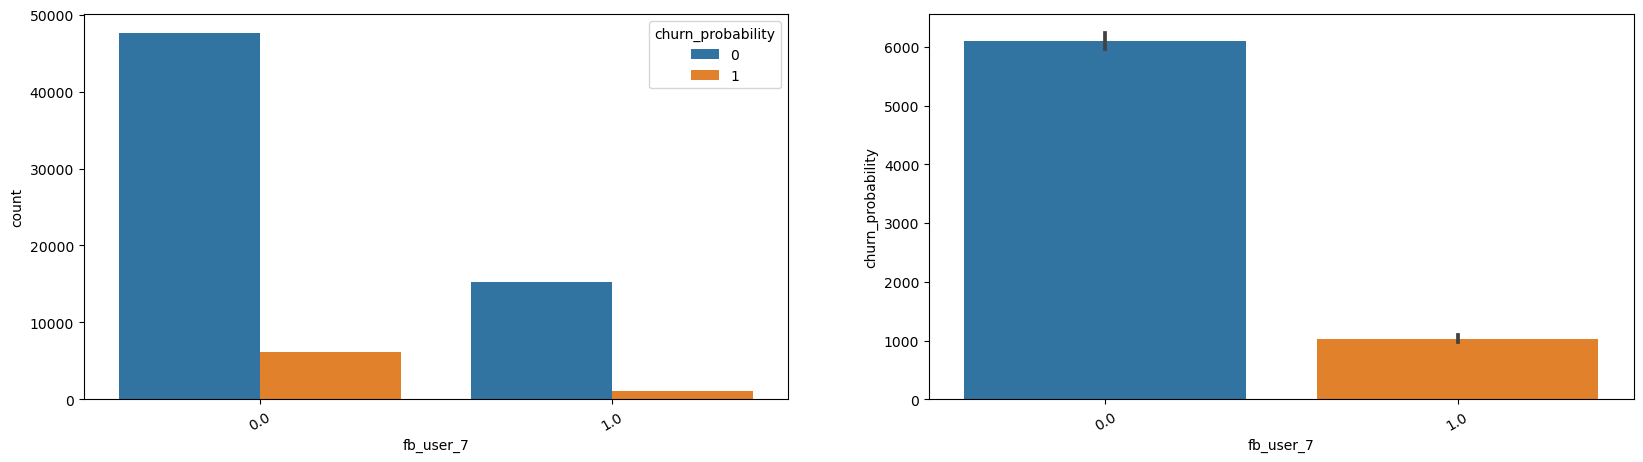

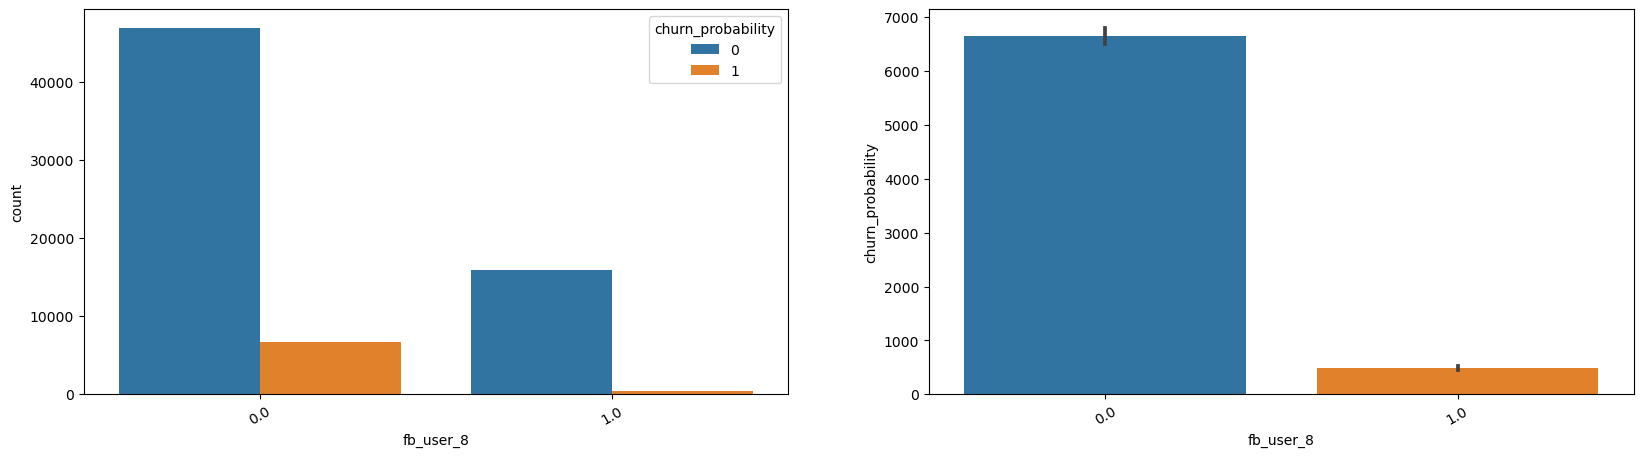

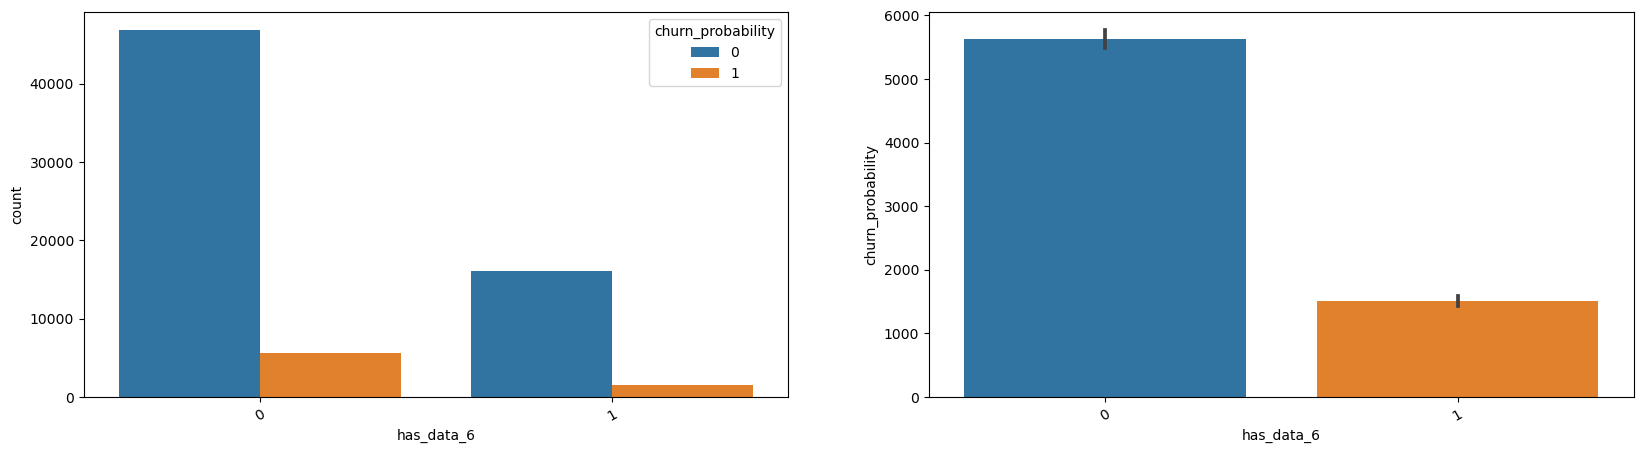

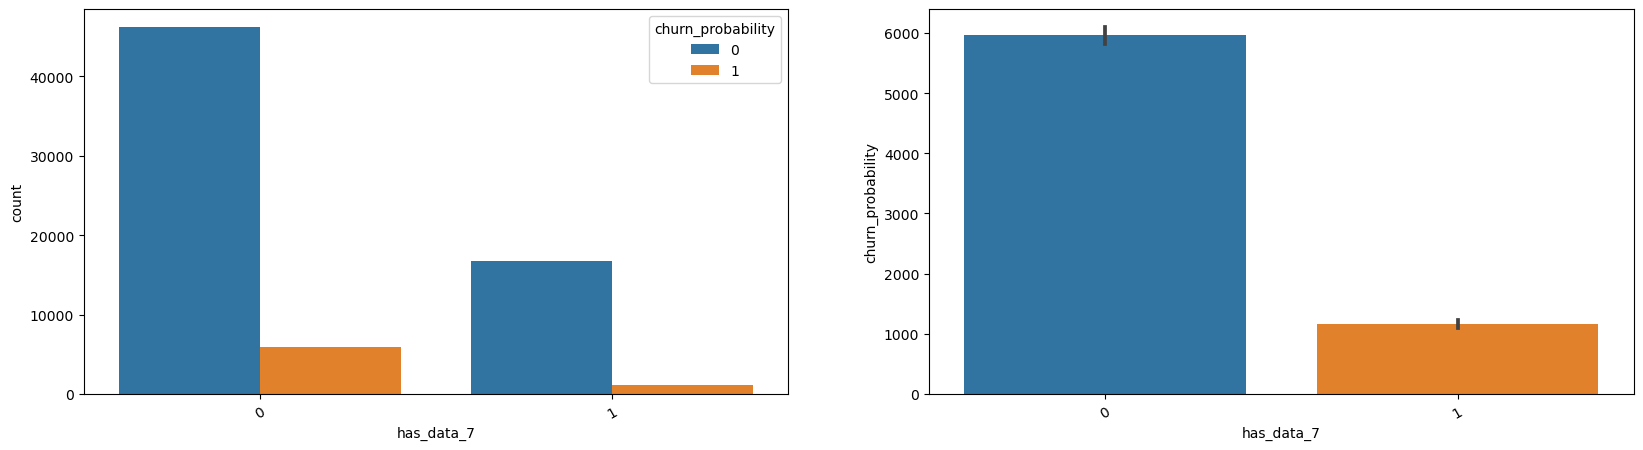

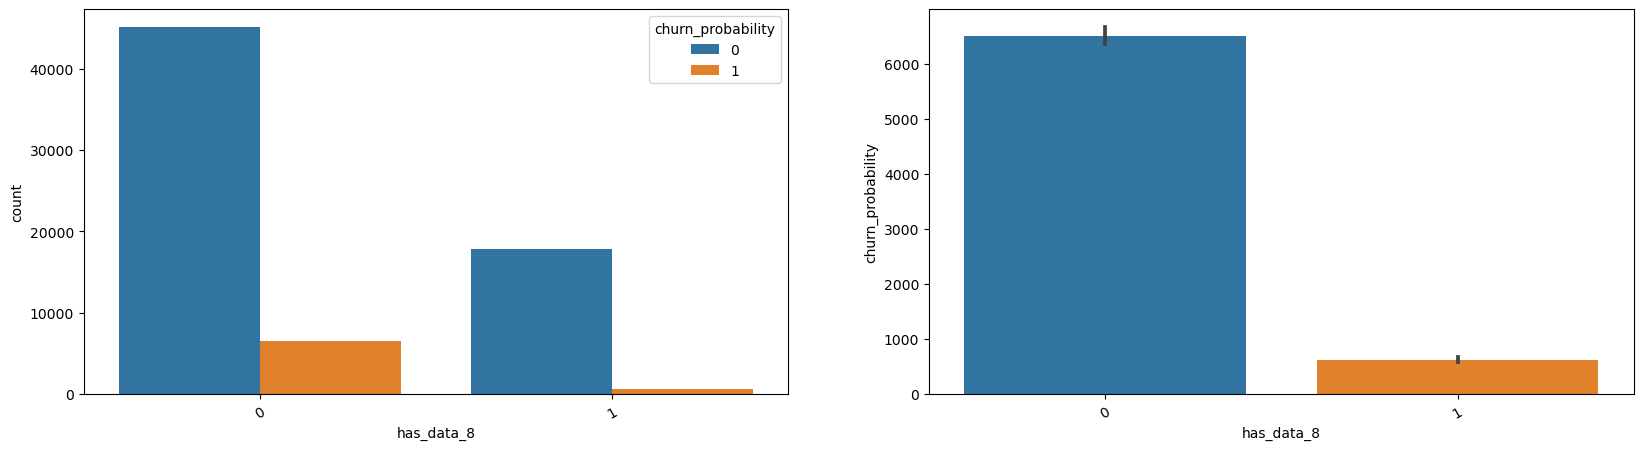

In [22]:
cat_plots(telecom_train, cat_vars, y_value)

##### Numeric Variables
there are clearly a lot of outliers, the tails of the kde plots are quite long. Additionally, it seems alot of these features are exponentially distributed


##### Categorical Variables 

most clients do not have data plans and it appears that the proportion of who churn regardless of plan is the same


Overall there also seems to be a lot of multicollinearity between fields but this should not be a problem for PCA. Will check the correlations next

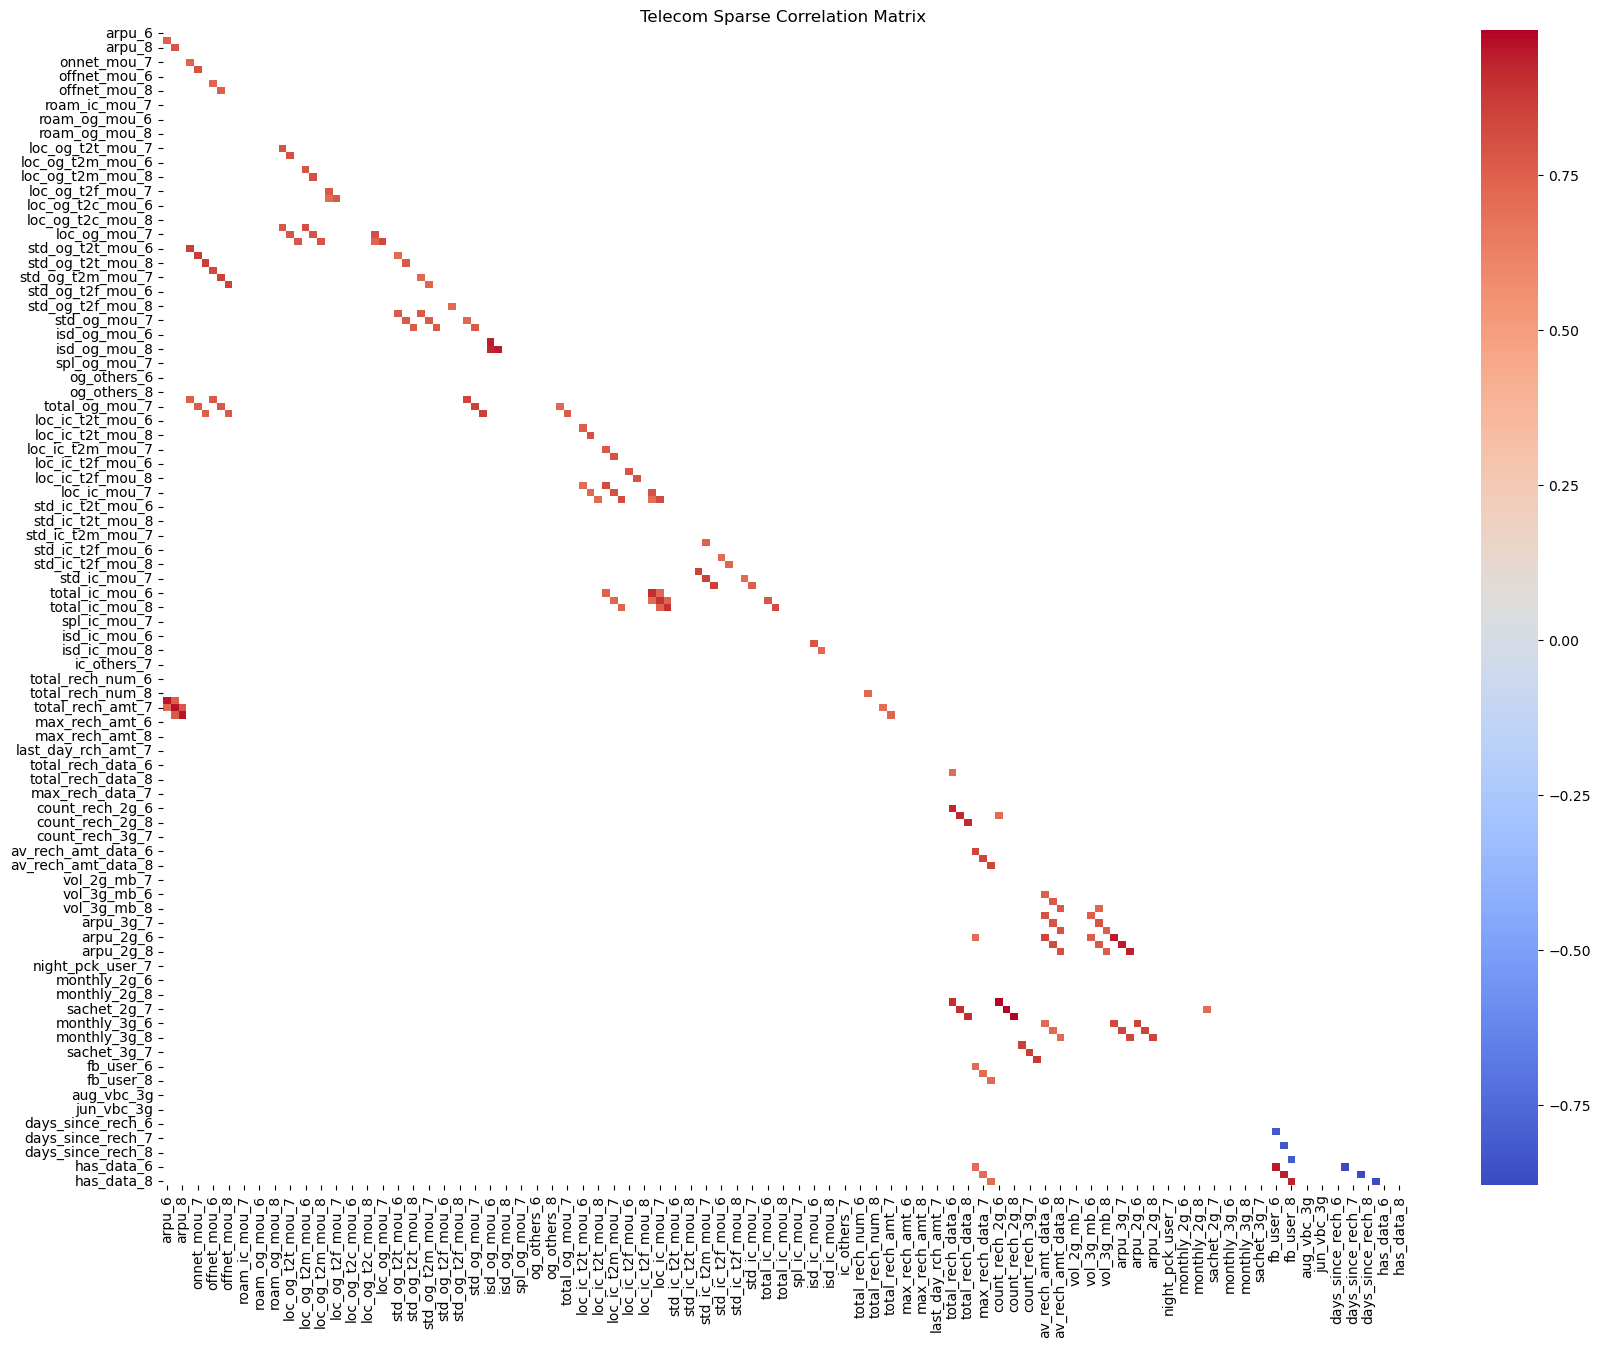

In [23]:
# Calculate the correlation matrix
telecom_corr = telecom_train.corr()

# Create a mask for the correlations outside the desired range
mask = np.logical_or(telecom_corr > 0.7, telecom_corr < -0.7)

# Apply the mask to the correlation matrix
sparse_corr_matrix = pd.DataFrame(np.where(mask, telecom_corr, np.nan),
                                  index=telecom_corr.index, columns=telecom_corr.columns)

# Drop completely empty rows and columns
sparse_corr_matrix.dropna(how='all', inplace=True)
sparse_corr_matrix.dropna(how='all', axis=1, inplace=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(sparse_corr_matrix, dtype=bool))

# Set a larger figure size
plt.figure(figsize=(20,15))

# Customize the color map and font size
sns.heatmap(sparse_corr_matrix, cmap='coolwarm', square=False, mask=mask)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set the title
plt.title('Telecom Sparse Correlation Matrix')

# Show the plot
plt.show()

While it is not the most readable, most features do not have high pearson r values  and those that do will be handled by PCA and RFE during selection of best features

#### Step 3 Feature Engineering and Variable Transformation :
   - SMOTE
   - splitting
   - scaling

feature transofrmation occurs after engineering so this means the steps should be splitting X,Y -> SMOTE -> Scaling -> PCA (for models) & T-SNE for visualising -> model selecting and tuning

In [35]:
#splitting into X and y using copy
telecom_train_copy = telecom_train.copy()

y = telecom_train_copy.pop(y_value) # y value previously assigned to churn_prob

X = telecom_train_copy #everythign but y value

In [36]:
#using SMOTE

#initialising object
smote = SMOTE()

#fitting on X and Y

X_resampled, y_resampled = smote.fit_resample(X,y)

y_resampled = pd.DataFrame(data=y_resampled, columns=[y_value])

In [37]:
X.shape

(69999, 160)

In [38]:
X_resampled.shape

(125734, 160)

In [41]:
y_resampled.value_counts()

churn_probability
0                    62867
1                    62867
dtype: int64

Note there are now equal distributions for both possibilities.

In [43]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_resampled)

X_columns = telecom_train_copy.columns

#rebuild dataframe
X_resampled =  pd.DataFrame(X_scaled, columns = X_columns)


In [46]:
#TSNE visualisation

tsne = TSNE(n_components=2) #make 2D array of data

X_tsne = tsne.fit_transform(X_resampled)
X_tsne_data = np.column_stack((X_tsne, y_resampled))
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

,Dim1,Dim2,class
0,25.312279,30.625324,0.0
1,57.639965,10.121200,0.0
2,-37.097183,-11.799767,0.0
3,-30.048811,-32.079720,0.0
4,88.087379,23.803925,0.0


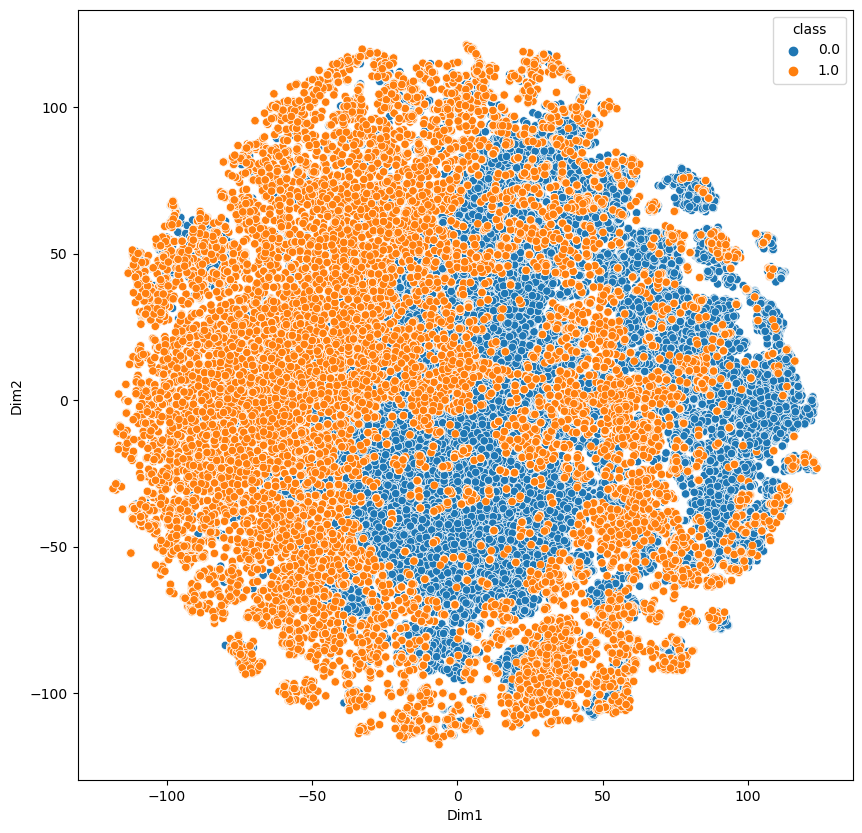

In [48]:
#plot using TSNE data
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()

not exactly linearly separable but t-sne is not a linear method. However, we can see that there is some separation between the two classes. 

In [24]:
notebook_end_time = datetime.datetime.now()

total_run_time = notebook_end_time - notebook_start_time
hours = total_run_time.seconds // 3600
minutes = (total_run_time.seconds % 3600) // 60
seconds = total_run_time.seconds % 60
print(f"time taken to run {hours} hours, {minutes} minutes, {seconds} seconds")

time taken to run 0 hours, 1 minutes, 26 seconds
